In [1]:
# importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import  Adam

Chamar banco de dados

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
# Set the path to the file you'd like to load
file_path = "train.csv" # arquivo que será carregado de dentro do dataset 

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,  # formato de carregamento - define que o dataset será carregado como DataFrame
  "lespin/house-prices-dataset", # nome do dataset no Kaggle
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head()) # exibe as primeiras linhas do dataset


C:\Users\ferna\AppData\Local\Temp\ipykernel_8352\1703646630.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

Pré-processamento dos dados

In [4]:
df = df.drop(columns=['Id', 'Alley', 'PoolQC', 'MasVnrType', 'MiscFeature', 'Fence', 'FireplaceQu'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna('None', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [7]:
col_cats = df.select_dtypes(include=['object']).columns
for col in col_cats:
    Le = LabelEncoder()
    df[col] = Le.fit_transform(df[col])

In [8]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

Separar dados de treinamento e teste

In [9]:
# Definir as variáveis X e y
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [10]:
# Separar dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
!pip install keras-tuner


   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   ---------------------------------------- 2/2 [keras-tuner]




[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\ferna\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 38771068928.0000 - val_loss: 37043212288.0000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37152579584.0000 - val_loss: 34466451456.0000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32532719616.0000 - val_loss: 26943645696.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21984212992.0000 - val_loss: 12944697344.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10981801984.0000 - val_loss: 4832575488.0000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8008729088.0000 - val_loss: 3923298560.0000
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6802052096.0000 - val_loss: 3592855552.0000
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6031316992.0000 - val_loss: 3283355648.0000
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5427723776.0000 - val_loss: 3098168576.0000
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4972

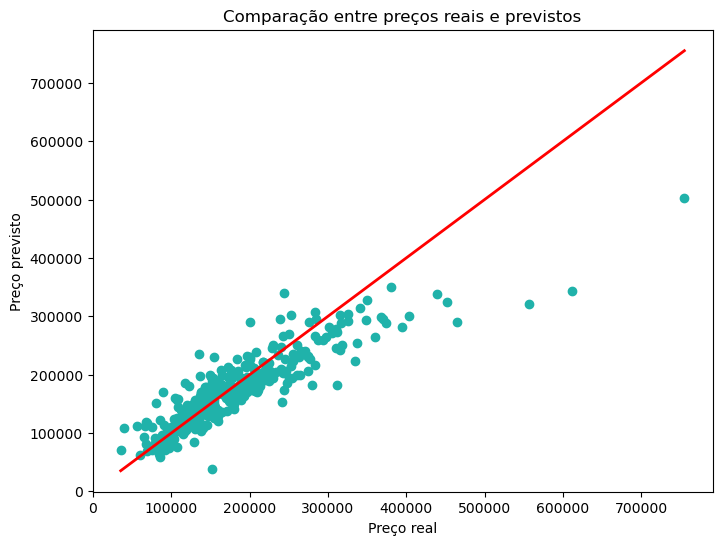

In [12]:
# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

model = Sequential()
model.add(Dense(37, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(19, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation= 'linear')) # camada de saída para regressão
#Compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#TReinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1) 
# Fazendo previsoes
y_pred = model.predict(X_test).flatten()
#Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='LightSeaGreen')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2) # posso remover esse comando se eu não quiser exibir a diaginal vermelha (linha de referência ideal)
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Comparação entre preços reais e previstos")
plt.savefig("real_vs_predicted.tiff", dpi=600)
plt.show()

In [26]:
import kerastuner as kt
from tensorflow.keras.layers import Dropout
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=16, max_value=256, step=16),
                    activation='relu'))
        if hp.Boolean(f'dropout_{i}'):
            model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, smapling='LOG')),
                  loss='mean_squared_error')
    return model

In [27]:
import os, sys, shutil, stat, random

In [37]:
#inicializando o tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='house_price_prediction'
)


#procurando o melhor modelo
tuner.search(X_train, y_train, epochs=100, validation_split=0.25)

#obter o melhor modelo
best_model = tuner.get_best_models(num_models=1)[0]

#fazendo previsoes com o melhor modelo
y_pred = best_model.predict(X_test)

#avaliação do melhor modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

#plotando os resultados do melhor modelo
plt.scatter(y_test, y_pred_best, color='MediumPurple')
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Prço real vc Preço revisto - meljor modelo")
plt.show()

#plotando loss e va_loss do melhor modelo
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.25, verbose=1).history
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Loss e Val_loss durante o treinamento")
plt.legend()
plt.show()

#salvar o modelo treinado
best_model.save('best_house_price_model.h5')

#exibir a arquitetura do modelo
best_model.summary()

#exibir o dropout
for layer in best_model.layers:
    if isinstance(layer, Dropout):
        print(f"Dropout rate: {layer.rate}")

TypeError: HyperParameters.Float() got an unexpected keyword argument 'smapling'